In [1]:
import pandas as pd

In [2]:
binary_df = pd.read_excel("OntologyChannelsMachineLearning.xlsx", engine="openpyxl" )
anc2vec_df = pd.read_excel("Anc2vecChannelsMachineLearning.xlsx", engine="openpyxl" )

In [24]:
print(binary_df)

          Mito        ER       RNA       AGP       DNA  position#1  \
0     Positive  Negative  Negative  Negative  Negative           0   
1     Positive  Negative  Negative  Negative  Negative           0   
2     Positive  Negative  Negative  Negative  Negative           0   
3     Positive  Positive  Positive  Positive  Positive           0   
4     Positive  Positive  Positive  Positive  Positive           0   
...        ...       ...       ...       ...       ...         ...   
8018  Positive  Positive  Positive  Positive  Positive           1   
8019  Positive  Positive  Positive  Positive  Positive           1   
8020  Positive  Positive  Positive  Positive  Positive           0   
8021  Positive  Positive  Positive  Positive  Positive           0   
8022  Positive  Positive  Positive  Positive  Positive           1   

      position#2  position#3  position#4  position#5  ...  position#3139  \
0              0           0           0           0  ...              0   
1      

In [25]:
print(anc2vec_df)

      embed_position#1  embed_position#2  embed_position#3  embed_position#4  \
0             0.000000          0.000000          0.000000          0.000000   
1             0.000000          0.000000          0.000000          0.000000   
2             0.096631          0.020835          0.322498          0.524267   
3            -0.249708         -0.579404          0.265524          0.311101   
4             0.253622         -1.498660          0.308171          0.519380   
...                ...               ...               ...               ...   
8018          0.453015         -0.809817          1.406478          1.320323   
8019          0.685031          0.379135          0.326327          0.100054   
8020         -0.262584         -0.153741         -0.312086         -0.354917   
8021          0.934864         -0.585499          1.841633          1.814322   
8022          1.901668         -1.303669          2.207054          2.427063   

      embed_position#5  embed_position#

In [3]:
concatenated_df = pd.concat([binary_df, anc2vec_df], ignore_index=False, axis = 1 )

In [4]:
print(concatenated_df)

          Mito        ER       RNA       AGP       DNA  position#1  \
0     Positive  Negative  Negative  Negative  Negative           0   
1     Positive  Negative  Negative  Negative  Negative           0   
2     Positive  Negative  Negative  Negative  Negative           0   
3     Positive  Positive  Positive  Positive  Positive           0   
4     Positive  Positive  Positive  Positive  Positive           0   
...        ...       ...       ...       ...       ...         ...   
8018  Positive  Positive  Positive  Positive  Positive           1   
8019  Positive  Positive  Positive  Positive  Positive           1   
8020  Positive  Positive  Positive  Positive  Positive           0   
8021  Positive  Positive  Positive  Positive  Positive           0   
8022  Positive  Positive  Positive  Positive  Positive           1   

      position#2  position#3  position#4  position#5  ...  embed_position#191  \
0              0           0           0           0  ...            0.000000 

In [7]:
import matplotlib.pyplot as plt

from sklearn.model_selection import cross_val_predict, KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.metrics import roc_curve, auc, accuracy_score
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import label_binarize, LabelEncoder

In [23]:
X = concatenated_df.iloc[:, 5:].values.tolist()

Mito_Y = concatenated_df['Mito'].tolist()
ER_Y = concatenated_df['ER'].tolist()
RNA_Y = concatenated_df['RNA'].tolist()
AGP_Y = concatenated_df['AGP'].tolist()
DNA_Y = concatenated_df['DNA'].tolist()

Positive


In [9]:
label_encoder = LabelEncoder()
y_binary_mito = label_encoder.fit_transform(Mito_Y)
y_binary_er = label_encoder.fit_transform(ER_Y)
y_binary_rna = label_encoder.fit_transform(RNA_Y)
y_binary_agp = label_encoder.fit_transform(AGP_Y)
y_binary_dna = label_encoder.fit_transform(DNA_Y)

In [10]:
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [26]:
random_forest = RandomForestClassifier()
L1 = LogisticRegression(penalty = 'l1', solver = 'liblinear')
logistic_regression = LogisticRegression(max_iter = 1000)
ridge_regression = Ridge()

In [12]:
rf_probs_mito = cross_val_predict(random_forest, X, y_binary_mito, cv=cv, method='predict_proba')[:, 1]
rf_fpr_mito, rf_tpr_mito, _ = roc_curve(y_binary_mito, rf_probs_mito)
rf_auc_mito = auc(rf_fpr_mito, rf_tpr_mito)

rf_probs_er = cross_val_predict(random_forest, X, y_binary_er, cv=cv, method='predict_proba')[:, 1]
rf_fpr_er, rf_tpr_er, _ = roc_curve(y_binary_er, rf_probs_er)
rf_auc_er = auc(rf_fpr_er, rf_tpr_er)

rf_probs_rna = cross_val_predict(random_forest, X, y_binary_rna, cv=cv, method='predict_proba')[:, 1]
rf_fpr_rna, rf_tpr_rna, _ = roc_curve(y_binary_rna, rf_probs_rna)
rf_auc_rna = auc(rf_fpr_rna, rf_tpr_rna)

rf_probs_agp = cross_val_predict(random_forest, X, y_binary_agp, cv=cv, method='predict_proba')[:, 1]
rf_fpr_agp, rf_tpr_agp, _ = roc_curve(y_binary_agp, rf_probs_agp)
rf_auc_agp = auc(rf_fpr_agp, rf_tpr_agp)

rf_probs_dna = cross_val_predict(random_forest, X, y_binary_dna, cv=cv, method='predict_proba')[:, 1]
rf_fpr_dna, rf_tpr_dna, _ = roc_curve(y_binary_dna, rf_probs_dna)
rf_auc_dna = auc(rf_fpr_dna, rf_tpr_dna)

In [13]:

lr_probs_mito = cross_val_predict(logistic_regression, X, y_binary_mito, cv=cv, method='predict_proba')[:, 1]
lr_fpr_mito, lr_tpr_mito, _ = roc_curve(y_binary_mito, lr_probs_mito)
lr_auc_mito = auc(lr_fpr_mito, lr_tpr_mito)

lr_probs_er = cross_val_predict(logistic_regression, X, y_binary_er, cv=cv, method='predict_proba')[:, 1]
lr_fpr_er, lr_tpr_er, _ = roc_curve(y_binary_er, lr_probs_er)
lr_auc_er = auc(lr_fpr_er, lr_tpr_er)

lr_probs_rna = cross_val_predict(logistic_regression, X, y_binary_rna, cv=cv, method='predict_proba')[:, 1]
lr_fpr_rna, lr_tpr_rna, _ = roc_curve(y_binary_rna, lr_probs_rna)
lr_auc_rna = auc(lr_fpr_rna, lr_tpr_rna)

lr_probs_agp = cross_val_predict(logistic_regression, X, y_binary_agp, cv=cv, method='predict_proba')[:, 1]
lr_fpr_agp, lr_tpr_agp, _ = roc_curve(y_binary_agp, lr_probs_agp)
lr_auc_agp = auc(lr_fpr_agp, lr_tpr_agp)

lr_probs_dna = cross_val_predict(logistic_regression, X, y_binary_dna, cv=cv, method='predict_proba')[:, 1]
lr_fpr_dna, lr_tpr_dna, _ = roc_curve(y_binary_dna, lr_probs_dna)
lr_auc_dna = auc(lr_fpr_dna, lr_tpr_dna)

In [14]:
ridge_probs_mito = cross_val_predict(ridge_regression, X, y_binary_mito, cv=cv)
ridge_fpr_mito, ridge_tpr_mito, _ = roc_curve(y_binary_mito, ridge_probs_mito)
ridge_auc_mito = auc(ridge_fpr_mito, ridge_tpr_mito)

ridge_probs_er = cross_val_predict(ridge_regression, X, y_binary_er, cv=cv)
ridge_fpr_er, ridge_tpr_er, _ = roc_curve(y_binary_er, ridge_probs_er)
ridge_auc_er = auc(ridge_fpr_er, ridge_tpr_er)

ridge_probs_rna = cross_val_predict(ridge_regression, X, y_binary_rna, cv=cv)
ridge_fpr_rna, ridge_tpr_rna, _ = roc_curve(y_binary_rna, ridge_probs_rna)
ridge_auc_rna = auc(ridge_fpr_rna, ridge_tpr_rna)

ridge_probs_agp = cross_val_predict(ridge_regression, X, y_binary_agp, cv=cv)
ridge_fpr_agp, ridge_tpr_agp, _ = roc_curve(y_binary_agp, ridge_probs_agp)
ridge_auc_agp = auc(ridge_fpr_agp, ridge_tpr_agp)

ridge_probs_dna = cross_val_predict(ridge_regression, X, y_binary_dna, cv=cv)
ridge_fpr_dna, ridge_tpr_dna, _ = roc_curve(y_binary_dna, ridge_probs_dna)
ridge_auc_dna = auc(ridge_fpr_dna, ridge_tpr_dna)

In [27]:
l1_probs_mito = cross_val_predict(L1, X, y_binary_mito, cv=cv, method='predict_proba')[:, 1]
l1_fpr_mito, l1_tpr_mito, _ = roc_curve(y_binary_mito, l1_probs_mito)
l1_auc_mito = auc(l1_fpr_mito, l1_tpr_mito)

l1_probs_er = cross_val_predict(L1, X, y_binary_er, cv=cv, method='predict_proba')[:, 1]
l1_fpr_er, l1_tpr_er, _ = roc_curve(y_binary_er, l1_probs_er)
l1_auc_er = auc(l1_fpr_er, l1_tpr_er)

l1_probs_rna = cross_val_predict(L1, X, y_binary_rna, cv=cv, method='predict_proba')[:, 1]
l1_fpr_rna, l1_tpr_rna, _ = roc_curve(y_binary_rna, l1_probs_rna)
l1_auc_rna = auc(l1_fpr_rna, l1_tpr_rna)

l1_probs_agp = cross_val_predict(L1, X, y_binary_agp, cv=cv, method='predict_proba')[:, 1]
l1_fpr_agp, l1_tpr_agp, _ = roc_curve(y_binary_agp, l1_probs_agp)
l1_auc_agp = auc(l1_fpr_agp, l1_tpr_agp)

l1_probs_dna = cross_val_predict(L1, X, y_binary_dna, cv=cv, method='predict_proba')[:, 1]
l1_fpr_dna, l1_tpr_dna, _ = roc_curve(y_binary_dna, l1_probs_dna)
l1_auc_dna = auc(l1_fpr_dna, l1_tpr_dna)

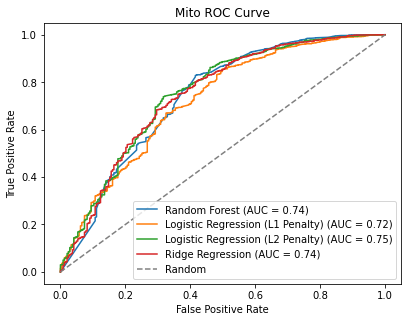

In [28]:
plt.figure(figsize=(6.4, 4.8))
plt.plot(rf_fpr_mito, rf_tpr_mito, label=f'Random Forest (AUC = {rf_auc_mito:.2f})')
plt.plot(l1_fpr_mito, l1_tpr_mito, label=f'Logistic Regression (L1 Penalty) (AUC = {l1_auc_mito:.2f})')
plt.plot(lr_fpr_mito, lr_tpr_mito, label=f'Logistic Regression (L2 Penalty) (AUC = {lr_auc_mito:.2f})')
plt.plot(ridge_fpr_mito, ridge_tpr_mito, label=f'Ridge Regression (AUC = {ridge_auc_mito:.2f})')


plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Mito ROC Curve')
plt.legend()
plt.savefig('ConcatenatedMito.png', bbox_inches='tight', facecolor='white', transparent=False, dpi=600)
plt.show()



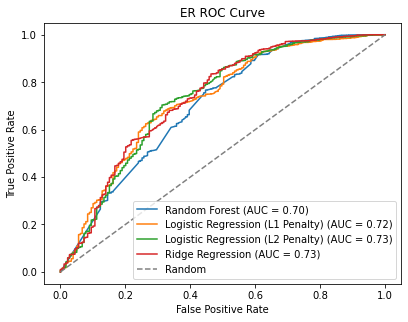

In [29]:
plt.figure(figsize=(6.4, 4.8))
plt.plot(rf_fpr_er, rf_tpr_er, label=f'Random Forest (AUC = {rf_auc_er:.2f})')
plt.plot(l1_fpr_er, l1_tpr_er, label=f'Logistic Regression (L1 Penalty) (AUC = {l1_auc_er:.2f})')
plt.plot(lr_fpr_er, lr_tpr_er, label=f'Logistic Regression (L2 Penalty) (AUC = {lr_auc_er:.2f})')
plt.plot(ridge_fpr_er, ridge_tpr_er, label=f'Ridge Regression (AUC = {ridge_auc_er:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ER ROC Curve')
plt.legend()
plt.savefig('ConcatenatedER.png', bbox_inches='tight', facecolor='white', transparent=False, dpi=600)
plt.show()



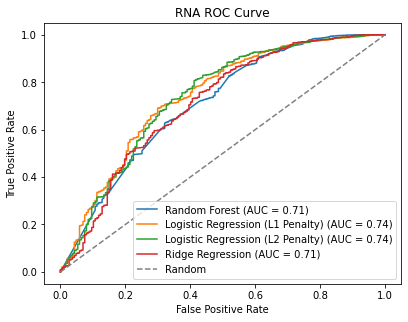

In [30]:
plt.figure(figsize=(6.4, 4.8))
plt.plot(rf_fpr_rna, rf_tpr_rna, label=f'Random Forest (AUC = {rf_auc_rna:.2f})')
plt.plot(l1_fpr_rna, l1_tpr_rna, label=f'Logistic Regression (L1 Penalty) (AUC = {l1_auc_rna:.2f})')
plt.plot(lr_fpr_rna, lr_tpr_rna, label=f'Logistic Regression (L2 Penalty) (AUC = {lr_auc_rna:.2f})')
plt.plot(ridge_fpr_rna, ridge_tpr_rna, label=f'Ridge Regression (AUC = {ridge_auc_rna:.2f})')


plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RNA ROC Curve')
plt.legend()
plt.savefig('ConcatenatedRNA.png', bbox_inches='tight', facecolor='white', transparent=False, dpi=600)
plt.show()



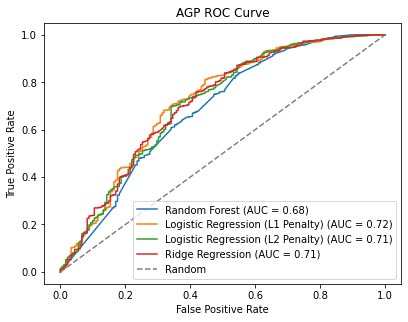

In [31]:
plt.figure(figsize=(6.4, 4.8))
plt.plot(rf_fpr_agp, rf_tpr_agp, label=f'Random Forest (AUC = {rf_auc_agp:.2f})')
plt.plot(l1_fpr_agp, l1_tpr_agp, label=f'Logistic Regression (L1 Penalty) (AUC = {l1_auc_agp:.2f})')
plt.plot(lr_fpr_agp, lr_tpr_agp, label=f'Logistic Regression (L2 Penalty) (AUC = {lr_auc_agp:.2f})')
plt.plot(ridge_fpr_agp, ridge_tpr_agp, label=f'Ridge Regression (AUC = {ridge_auc_agp:.2f})')


plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('AGP ROC Curve')
plt.legend()
plt.savefig('ConcatenatedAGP.png', bbox_inches='tight', facecolor='white', transparent=False, dpi=600)
plt.show()


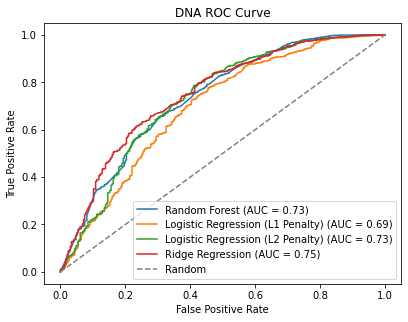

In [32]:
plt.figure(figsize=(6.4, 4.8))
plt.plot(rf_fpr_dna, rf_tpr_dna, label=f'Random Forest (AUC = {rf_auc_dna:.2f})')
plt.plot(l1_fpr_dna, l1_tpr_dna, label=f'Logistic Regression (L1 Penalty) (AUC = {l1_auc_dna:.2f})')
plt.plot(lr_fpr_dna, lr_tpr_dna, label=f'Logistic Regression (L2 Penalty) (AUC = {lr_auc_dna:.2f})')
plt.plot(ridge_fpr_dna, ridge_tpr_dna, label=f'Ridge Regression (AUC = {ridge_auc_dna:.2f})')


plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('DNA ROC Curve')
plt.legend()
plt.savefig('ConcatenatedDNA.png', bbox_inches='tight', facecolor='white', transparent=False, dpi=600)
plt.show()

